# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from scipy import stats
import pandas as pd
from config import api_key
from scipy.stats import linregress
import numpy as np
import json

## Generate Cities List

In [2]:
# Latitude adn longitud ranges 
latitudes_range = (-90, 90)
longitudes_range = (-180, 180)
#List for saving the cities names and total number of cities
cities_list= []
num_cities = 2000
# RandomState Latitudes and longitudes generation
random_seed = np.random.RandomState(12345678)
latitudes_list = random_seed.randint(low =latitudes_range[0], high=latitudes_range[1], size=num_cities)
longitudes_list = random_seed.randint(low =longitudes_range[0], high=longitudes_range[1], size=num_cities)

for i in range(num_cities):
    city_name = citipy.nearest_city(latitudes_list[i], longitudes_list[i]).city_name
    if city_name not in cities_list:
        cities_list.append(city_name)

print(f'The total number of generated cities is: {len(cities_list)}')

The total number of generated cities is: 764


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API verification for identifiying the information required 
# city = London
url_base= url_base = "http://api.openweathermap.org/data/2.5/weather?q=London&units=imperial&APPID="
response = requests.get(url_base+api_key).json()
print(json.dumps(response,indent = 4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1601767946,
    "id": 2643743,
    "main": {
        "feels_like": 45.34,
        "humidity": 81,
        "pressure": 982,
        "temp": 50.95,
        "temp_max": 53.6,
        "temp_min": 50
    },
    "name": "London",
    "rain": {
        "1h": 1.33
    },
    "sys": {
        "country": "GB",
        "id": 1414,
        "sunrise": 1601791589,
        "sunset": 1601832694,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 8.05
    }
}


In [4]:
# API Call
# url creation with units = Imperial for getting the results in Fahrenheit
url_base = "http://api.openweathermap.org/data/2.5/weather?q="
units = "&units=imperial"
api_call = "&APPID="+api_key

cities_response = {"City": [], "Lat": [],"Lng": [],"Max Temp": [],"Humidity": [], "Cloudiness": [],
                   "Wind Speed": [],"Country": [], "Date": [] }
cont_no_info=0
cont_cities = 0
# Creates variable for response code then prints response code to the console
for city in cities_list:
    cont_cities = cont_cities + 1
    response = requests.get(url_base+city+units+api_call).json()
    try:
        print(f"{cont_cities} Processing {city}")
        
        cities_response["City"].append(response["name"])
        cities_response["Lat"].append(response["coord"]["lat"])
        cities_response["Lng"].append(response["coord"]["lon"])
        cities_response["Max Temp"].append(response["main"]["temp_max"])
        cities_response["Humidity"].append(response["main"]["humidity"])
        cities_response["Cloudiness"].append(response["clouds"]["all"])
        cities_response["Wind Speed"].append(response["wind"]["speed"])
        cities_response["Country"].append(response["sys"]["country"])
        cities_response["Date"].append(response["dt"])
    except:
        print(f"{cont_cities} No information for:{city}")
        cont_no_info= cont_no_info+1
        pass

print(f"Process complete! - not able to get information for {cont_no_info} cities")     

1 Processing mys shmidta
1 No information for:mys shmidta
2 Processing chokurdakh
3 Processing torbay
4 Processing qaanaaq
5 Processing bredasdorp
6 Processing arraial do cabo
7 Processing pisco
8 Processing vaini
9 Processing mataura
10 Processing east london
11 Processing burnie
12 Processing kapaa
13 Processing luderitz
14 Processing hermanus
15 Processing aklavik
16 Processing codrington
17 Processing cidreira
18 Processing marawi
19 Processing esperance
20 Processing vaitupu
20 No information for:vaitupu
21 Processing bihoro
22 Processing punta arenas
23 Processing taolanaro
23 No information for:taolanaro
24 Processing avarua
25 Processing ushuaia
26 Processing albany
27 Processing morris
28 Processing butaritari
29 Processing rikitea
30 Processing saint-philippe
31 Processing yellowknife
32 Processing saldanha
33 Processing nanortalik
34 Processing carutapera
35 Processing brasileia
36 Processing saskylakh
37 Processing cape town
38 Processing busselton
39 Processing fortuna
40 

310 Processing sarai naurang
311 Processing saint george
312 Processing devonport
313 Processing tahlequah
314 Processing waitati
315 Processing khatanga
316 Processing djambala
317 Processing geresk
317 No information for:geresk
318 Processing bafq
319 Processing winnemucca
320 Processing te anau
321 Processing belushya guba
321 No information for:belushya guba
322 Processing klaksvik
323 Processing lubao
324 Processing normandin
325 Processing gwadar
326 Processing yurimaguas
327 Processing san carlos de bariloche
328 Processing warrnambool
329 Processing lethem
330 Processing sao jose da coroa grande
331 Processing chapais
332 Processing lavrentiya
333 Processing lalomanu
333 No information for:lalomanu
334 Processing dutlwe
335 Processing vao
336 Processing calvinia
337 Processing pacifica
338 Processing saint-francois
339 Processing urumqi
340 Processing vung tau
341 Processing tabou
342 Processing fare
343 Processing grand river south east
343 No information for:grand river south

608 Processing high level
609 Processing hudson bay
610 Processing porbandar
611 Processing samusu
611 No information for:samusu
612 Processing beringovskiy
613 Processing dukat
614 Processing purranque
615 Processing north bend
616 Processing junagarh
617 Processing sosenskiy
618 Processing sisimiut
619 Processing faya
620 Processing taburao
620 No information for:taburao
621 Processing jiuquan
622 Processing linhares
623 Processing bayan
624 Processing peachland
625 Processing namatanai
626 Processing ilam
627 Processing alegrete
628 Processing zavallya
629 Processing iwanai
630 Processing neuquen
631 Processing burica
631 No information for:burica
632 Processing huambo
633 Processing krasnorechenskiy
634 Processing copperas cove
635 Processing virden
636 Processing amudat
637 Processing saint anthony
638 Processing vitorino freire
639 Processing mehamn
640 Processing fitionesti
641 Processing lolua
641 No information for:lolua
642 Processing srednekolymsk
643 Processing vestmannaeyj

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# DataFeame conversion
cities_df = pd.DataFrame(cities_response)
print(cities_df.shape)
cities_df

(691, 9)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,30.34,96,99,14.03,RU,1601768024
1,Torbay,47.67,-52.73,60.01,87,90,17.22,CA,1601768024
2,Qaanaaq,77.48,-69.36,23.95,89,100,0.56,GL,1601768024
3,Bredasdorp,-34.53,20.04,59.00,93,40,8.05,ZA,1601768024
4,Arraial do Cabo,-22.97,-42.03,75.20,94,75,8.05,BR,1601768024
...,...,...,...,...,...,...,...,...,...
686,Zhaoyang,42.68,126.03,43.36,82,99,17.92,CN,1601768083
687,Sola,-13.88,167.55,78.76,79,30,20.22,VU,1601768083
688,Nevel',56.02,29.93,54.66,62,100,10.58,RU,1601768083
689,Antalaha,-14.90,50.28,69.33,88,16,5.03,MG,1601768083


In [6]:
# Exporting data to CSV file
cities_df.to_csv("cities_data.csv",index_label="ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Checking humidity numbers
# #cities_df['Humidity'].value_counts()
print(f'The maximun value in humidity is: {cities_df["Humidity"].max()}')
print(f'Humidity valiues are: {cities_df["Humidity"].sort_values(ascending=False)}')


The maximun value in humidity is: 100
Humidity valiues are: 77     100
53     100
144    100
141    100
275    100
      ... 
615      5
652      4
539      4
161      3
422      2
Name: Humidity, Length: 691, dtype: int64


No cities with humidity higger than 100%


In [8]:
# Summary table creation (Counting the number od parameters and calculating mean, standard deviation, maximum and minimum values

summary_table = pd.DataFrame([cities_df.count(), cities_df.mean(), cities_df.std(), cities_df.min(), cities_df.max()],
                             columns=["Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"])
summary_table['Parameter'] = ["count", "mean","std","min","max"]
summary_table = summary_table.set_index(['Parameter'])
summary_table

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
Parameter,,,,,,
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,19.468553,20.817931,63.841693,71.861071,51.535456,8.123893
std,32.641250,91.044184,17.027476,20.870569,38.254674,5.493355
min,-54.800000,-175.200000,21.290000,2.000000,0.000000,0.220000
max,78.220000,179.320000,98.600000,100.000000,100.000000,32.350000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

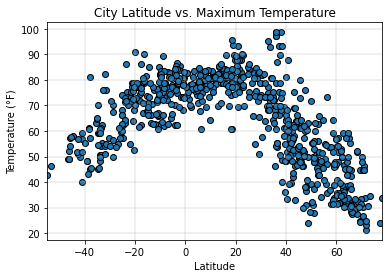

In [9]:
min_latitue = cities_df["Lat"].min()
max_latitue = cities_df["Lat"].max()
f1, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Maximum Temperature')
ax.scatter(cities_df['Lat'], cities_df['Max Temp'],edgecolors='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature (°F)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)

f1.savefig('Figures/Latitude_Temperature.png')

In the chart, it is possible to see how temperature is increasing in the cities closer to the Ecuator. However, the maximum temperature is not in latitude 0 as it was expected, but it is not possible to conclude that other latitude has higher tempertures because of the number of cities around every latitude are not the same.
Which this cities, we can se that the ones around latitude 20 are warmer. 

## Latitude vs. Humidity Plot

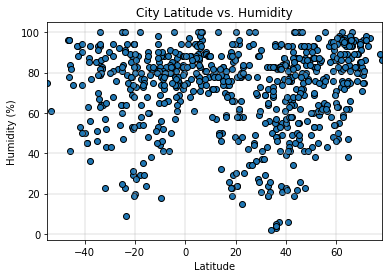

In [10]:
min_latitue = cities_df["Lat"].min()
max_latitue = cities_df["Lat"].max()
f2, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Humidity')
ax.scatter(cities_df['Lat'], cities_df['Humidity'],edgecolors='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)

f2.savefig('Figures/Latitude_Humidity.png')

## Latitude vs. Cloudiness Plot

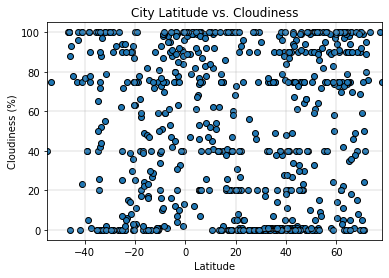

In [11]:
min_latitue = cities_df["Lat"].min()
max_latitue = cities_df["Lat"].max()
f3, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Cloudiness')
ax.scatter(cities_df['Lat'], cities_df['Cloudiness'],edgecolors='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)

f3.savefig('Figures/Latitude_Cloudiness.png')

## Latitude vs. Wind Speed Plot

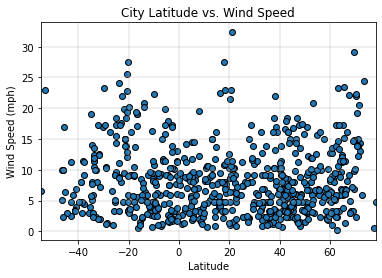

In [12]:
min_latitue = cities_df["Lat"].min()
max_latitue = cities_df["Lat"].max()
f4, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Wind Speed')
ax.scatter(cities_df['Lat'], cities_df['Wind Speed'],edgecolors='black')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)

f4.savefig('Figures/Latitude_WindSpeed.png')

## Linear Regression

In [13]:
Northern_data = cities_df.loc[cities_df["Lat"]>=0,:]
Southern_data = cities_df.loc[cities_df["Lat"]<0,:]
print(f'There are {len(Northern_data)} cities located in the Northern Hemisphere (Dataframe size: {Northern_data.shape})')
print(f'There are {len(Southern_data)} cities located in the Southern Hemisphere (Dataframe size: {Southern_data.shape})')

There are 467 cities located in the Northern Hemisphere (Dataframe size: (467, 9))
There are 224 cities located in the Southern Hemisphere (Dataframe size: (224, 9))


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.804314451854435


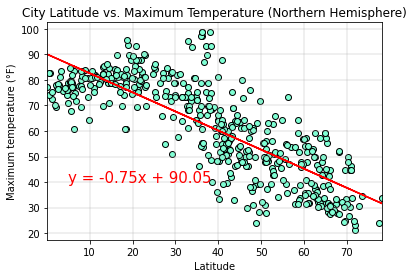

In [14]:
min_latitue = Northern_data["Lat"].min()
max_latitue = Northern_data["Lat"].max()
# Data definition
x_values = Northern_data['Lat']
y_values = Northern_data['Max Temp']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
fig, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Maximum Temperature (Northern Hemisphere)')
ax.scatter(x_values, y_values,c='aquamarine', edgecolors='black')
ax.plot(x_values,regress_values,"r-")
ax.set_xlabel('Latitude')
ax.set_ylabel('Maximum temperature (°F)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)
ax.annotate(line_eq,(5,40),fontsize=15,color="red")

fig.savefig('Figures/Lat_Tem_NH.png')
print(f'The r-value is: {rvalue}')

The regression line is showing how temperature is decreasing while latitude is farer from the Ecuator in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7314080427209432


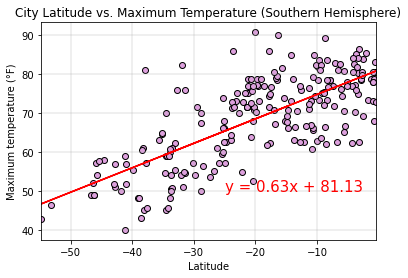

In [15]:
min_latitue = Southern_data["Lat"].min()
max_latitue = Southern_data["Lat"].max()
# Data definition
x_values = Southern_data['Lat']
y_values = Southern_data['Max Temp']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
fig, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Maximum Temperature (Southern Hemisphere)')
ax.scatter(x_values, y_values,c='plum', edgecolors='black')
ax.plot(x_values,regress_values,"r-")
ax.set_xlabel('Latitude')
ax.set_ylabel('Maximum temperature (°F)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)
ax.annotate(line_eq,(-25,50),fontsize=15,color="red")

fig.savefig('Figures/Lat_Tem_SH.png')
print(f'The r-value is: {rvalue}')

The regression line is showing how temperature is increasing while latitude is closer to the Ecuator in the Southern Hemisphere.

The r-value is: 0.08337721045232455


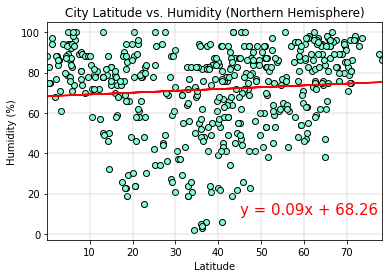

In [16]:
min_latitue = Northern_data["Lat"].min()
max_latitue = Northern_data["Lat"].max()
# Data definition
x_values = Northern_data['Lat']
y_values = Northern_data['Humidity']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
fig, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Humidity (Northern Hemisphere)')
ax.scatter(x_values, y_values,c='aquamarine', edgecolors='black')
ax.plot(x_values,regress_values,"r-")
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)
ax.annotate(line_eq,(45,10),fontsize=15,color="red")

fig.savefig('Figures/Lat_Humidity_NH.png')
print(f'The r-value is: {rvalue}')

Humidity in the Northern Hemisphere is not showing especific changes around the latitude values. It is possible to see how values are scattered around all the latitudes, and how the regression line has a small positive slope because of the dispersion.    

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03190738810022345


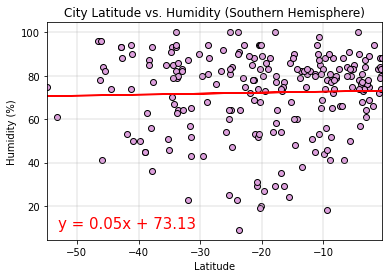

In [17]:
min_latitue = Southern_data["Lat"].min()
max_latitue = Southern_data["Lat"].max()
# Data definition
x_values = Southern_data['Lat']
y_values = Southern_data['Humidity']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
fig, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Humidity (Southern Hemisphere)')
ax.scatter(x_values, y_values,c='plum', edgecolors='black')
ax.plot(x_values,regress_values,"r-")
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)
ax.annotate(line_eq,(-53,10),fontsize=15,color="red")

fig.savefig('Figures/Lat_Humidity_SH.png')
print(f'The r-value is: {rvalue}')

Acording to the line regression, humidity in the Southern Hemisphere is increasing around the latitude values closer to the Ecuator. It is possible to see how values are scattered around the latitudes, and there are some datapoints far away from the regression line. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06100693693263732


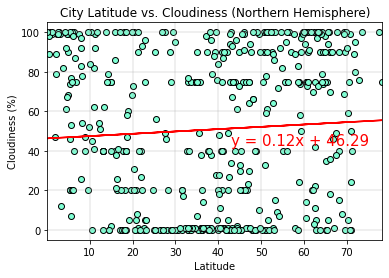

In [18]:
min_latitue = Northern_data["Lat"].min()
max_latitue = Northern_data["Lat"].max()
# Data definition
x_values = Northern_data['Lat']
y_values = Northern_data['Cloudiness']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
fig, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Cloudiness (Northern Hemisphere)')
ax.scatter(x_values, y_values,c='aquamarine', edgecolors='black')
ax.plot(x_values,regress_values,"r-")
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)
ax.annotate(line_eq,(43,43),fontsize=15,color="red")

fig.savefig('Figures/Lat_Cloudiness_NH.png')
print(f'The r-value is: {rvalue}')

For the Northern Hemisphere, acording to the regression line Cloudiness increase while latitude increase.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.03882368118834841


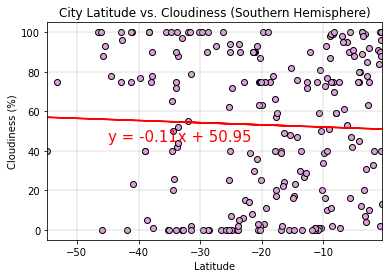

In [19]:
min_latitue = Southern_data["Lat"].min()
max_latitue = Southern_data["Lat"].max()
# Data definition
x_values = Southern_data['Lat']
y_values = Southern_data['Cloudiness']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
fig, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Cloudiness (Southern Hemisphere)')
ax.scatter(x_values, y_values,c='plum', edgecolors='black')
ax.plot(x_values,regress_values,"r-")
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)
ax.annotate(line_eq,(-45,45),fontsize=15,color="red")

fig.savefig('Figures/Lat_Cloudiness_SH.png')
print(f'The r-value is: {rvalue}')

For the Southern Hemisphere, acording to the regression line Cloudiness increase while latitude increase and get closer to the Ecuator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12922618804338215


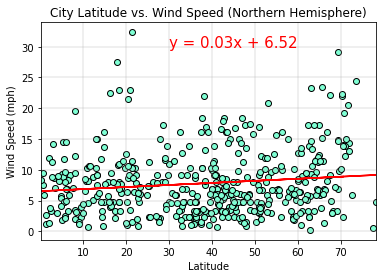

In [20]:
min_latitue = Northern_data["Lat"].min()
max_latitue = Northern_data["Lat"].max()
# Data definition
x_values = Northern_data['Lat']
y_values = Northern_data['Wind Speed']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
fig, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Wind Speed (Northern Hemisphere)')
ax.scatter(x_values, y_values,c='aquamarine', edgecolors='black')
ax.plot(x_values,regress_values,"r-")
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)
ax.annotate(line_eq,(30,30),fontsize=15,color="red")

fig.savefig('Figures/Lat_Wind Speed_NH.png')
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0669742239049365


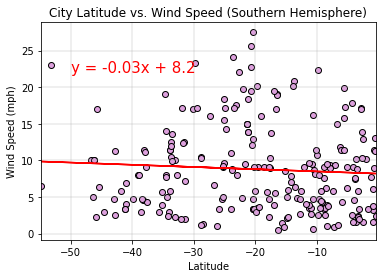

In [21]:
min_latitue = Southern_data["Lat"].min()
max_latitue = Southern_data["Lat"].max()
# Data definition
x_values = Southern_data['Lat']
y_values = Southern_data['Wind Speed']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
fig, ax = plt.subplots(1,1)
ax.set_title('City Latitude vs. Wind Speed (Southern Hemisphere)')
ax.scatter(x_values, y_values,c='plum', edgecolors='black')
ax.plot(x_values,regress_values,"r-")
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.grid(linestyle='-', linewidth=0.4)
ax.set_xlim(min_latitue, max_latitue)
ax.annotate(line_eq,(-50,22),fontsize=15,color="red")

fig.savefig('Figures/Lat_WindSpeed_SH.png')
print(f'The r-value is: {rvalue}')

Wind Speed in both hemispheres has concentrated values, there is not any afectation in this parameter acording to the latitude. 